# Statistical comparison between band envelopes of snippets of one sound and of different sounds

<font size="3">We want to understand how much marginal statistics vary between band envelopes of snippets of one sound, and how much marginal statistics vary between band envelopes of different sounds. In the analysis below we see that marginal statistics between snippets of a sound are very similar, whereas the marginal statistics between different sounds tend to vary more.</font>

### Comparing marginal statistics of band envelopes between different snippets of a sound file

In [1]:
import os
import sys
sys.path.append('..')
from scipy.io import wavfile
import settings
import soundanalysis
import sound_files
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
from IPython.display import Audio

C:\Users\elape\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


<font size="3">Read the wav sound file <em>heavy_rain</em> downloaded from the BBC website. Since it's 6 minutes long, create three 1-minute long snippets.</font>

In [2]:
files = ['heavy_rain_snippet1.wav', 'heavy_rain_snippet2.wav', 'heavy_rain_snippet3.wav']

first_sound = os.path.join(settings.SOUNDS_PATH, files[0])
sound1 = soundanalysis.SoundAnalysis(soundfile=first_sound)

second_sound = os.path.join(settings.SOUNDS_PATH, files[1])
sound2 = soundanalysis.SoundAnalysis(soundfile=second_sound)

third_sound = os.path.join(settings.SOUNDS_PATH, files[2])
sound3 = soundanalysis.SoundAnalysis(soundfile=third_sound)

<font size="3">Analyze each one of the snippets - create and apply filterbank, calculate the envelopes for each band, apply compression to them and then calculate marginal statistics for each envelope.</font>

In [4]:
sound1.analyze(4, [20, 8000])
sound2.analyze(4, [20, 8000])
sound3.analyze(4, [20, 8000])

Creating filterbank...
Applying filterbank...
Calculating envelopes...
Applying compression...
Calculating statistics...
Creating filterbank...
Applying filterbank...
Calculating envelopes...
Applying compression...
Calculating statistics...
Creating filterbank...
Applying filterbank...
Calculating envelopes...
Applying compression...
Calculating statistics...


({'mean': array([ 8.54530319, 12.64909257, 11.61606475,  7.75549588]),
  'var': array([2.40741444, 5.28120122, 4.53249801, 2.02027153]),
  'var/meanSq': array([0.03296825, 0.0330076 , 0.03359074, 0.0335885 ]),
  'skew': array([-0.39824622, -0.30647404, -0.24946932, -0.2330556 ]),
  'kurt': array([3.09962572, 3.08766701, 3.23011614, 3.34668754]),
  'corr': array([[ 1.00000000e+00,  1.49975924e-01,  1.86212044e-02,
           6.92784714e-04],
         [ 1.49975924e-01,  1.00000000e+00,  1.79851346e-01,
          -2.73898974e-02],
         [ 1.86212044e-02,  1.79851346e-01,  1.00000000e+00,
           6.60219932e-02],
         [ 6.92784714e-04, -2.73898974e-02,  6.60219932e-02,
           1.00000000e+00]])},
 <soundanalysis.FilterBank at 0x165dbe00608>)

<font size="3">Calculate and compare the mean of the envelopes of each band in each one of our snippets.</font>

<BarContainer object of 4 artists>

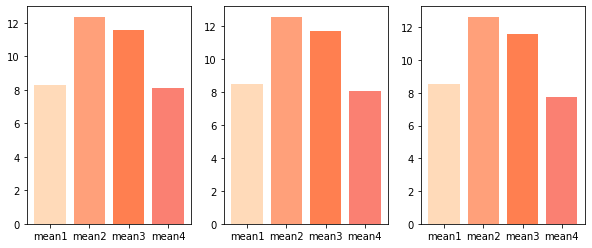

In [5]:
mean1 = ['mean1', 'mean2', 'mean3', 'mean4']
means1 = [sound1.bandsStats['mean'][0], sound1.bandsStats['mean'][1], sound1.bandsStats['mean'][2], sound1.bandsStats['mean'][3]]
mean2 = ['mean1', 'mean2', 'mean3', 'mean4']
means2 = [sound2.bandsStats['mean'][0], sound2.bandsStats['mean'][1], sound2.bandsStats['mean'][2], sound2.bandsStats['mean'][3]]
mean3 = ['mean1', 'mean2', 'mean3', 'mean4']
means3 = [sound3.bandsStats['mean'][0], sound3.bandsStats['mean'][1], sound3.bandsStats['mean'][2], sound3.bandsStats['mean'][3]]

fig, axes = plt.subplots(1, 3, figsize=(10,4))
x = np.linspace(0, 5, 11)

axes[0].bar(mean1, means1, color=['peachpuff', 'lightsalmon', 'coral', 'salmon'])
axes[1].bar(mean2, means2, color=['peachpuff', 'lightsalmon', 'coral', 'salmon'])
axes[2].bar(mean3, means3, color=['peachpuff', 'lightsalmon', 'coral', 'salmon'])

<font size="3">The mean of each band tells us that one band is louder than another. Looking at the means of each band envelope of each snippet, we can tell that they don't change a lot. The mean values remain somewhat same between the three snippets. Now we will calculate and compare the variance of the envelopes of each band in each one of our snippets.</font>

<BarContainer object of 4 artists>

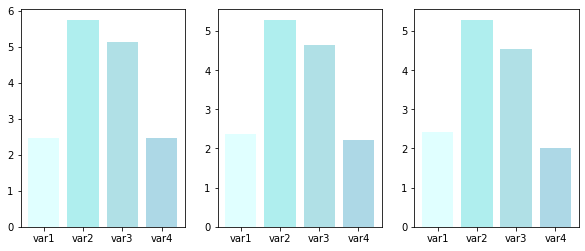

In [6]:
variance1 = ['var1', 'var2', 'var3', 'var4']
variances1 = [sound1.bandsStats['var'][0], sound1.bandsStats['var'][1], sound1.bandsStats['var'][2], sound1.bandsStats['var'][3]]
variance2 = ['var1', 'var2', 'var3', 'var4']
variances2 = [sound2.bandsStats['var'][0], sound2.bandsStats['var'][1], sound2.bandsStats['var'][2], sound2.bandsStats['var'][3]]
variance3 = ['var1', 'var2', 'var3', 'var4']
variances3 = [sound3.bandsStats['var'][0], sound3.bandsStats['var'][1], sound3.bandsStats['var'][2], sound3.bandsStats['var'][3]]

fig, axes = plt.subplots(1, 3, figsize=(10,4))
x = np.linspace(0, 5, 11)

axes[0].bar(variance1,variances1, color=['lightcyan', 'paleturquoise', 'powderblue', 'lightblue'])
axes[1].bar(variance2,variances2, color=['lightcyan', 'paleturquoise', 'powderblue', 'lightblue'])
axes[2].bar(variance3,variances3, color=['lightcyan', 'paleturquoise', 'powderblue', 'lightblue'])

<font size="3">We don't see a big difference when comparing the variance of each band envelope of each snippet. Let's calculate and compare the kurtosis of the envelopes of each band in each one of our snippets.</font>

<BarContainer object of 4 artists>

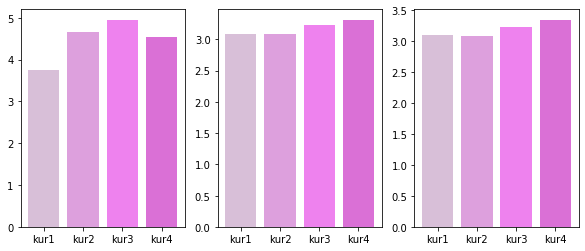

In [7]:
kurtosis1 = ['kur1', 'kur2', 'kur3', 'kur4']
kurtoses1 = [sound1.bandsStats['kurt'][0], sound1.bandsStats['kurt'][1], sound1.bandsStats['kurt'][2], sound1.bandsStats['kurt'][3]]
kurtosis2 = ['kur1', 'kur2', 'kur3', 'kur4']
kurtoses2 = [sound2.bandsStats['kurt'][0], sound2.bandsStats['kurt'][1], sound2.bandsStats['kurt'][2], sound2.bandsStats['kurt'][3]]
kurtosis3 = ['kur1', 'kur2', 'kur3', 'kur4']
kurtoses3 = [sound3.bandsStats['kurt'][0], sound3.bandsStats['kurt'][1], sound3.bandsStats['kurt'][2], sound3.bandsStats['kurt'][3]]

fig, axes = plt.subplots(1, 3, figsize=(10,4))
x = np.linspace(0, 5, 11)

axes[0].bar(kurtosis1,kurtoses1, color=['thistle', 'plum', 'violet', 'orchid'])
axes[1].bar(kurtosis2,kurtoses2, color=['thistle', 'plum', 'violet', 'orchid'])
axes[2].bar(kurtosis3,kurtoses3, color=['thistle', 'plum', 'violet', 'orchid'])

<font size="3">There is a difference when comparing the kurtosis of each band envelope of each snippet. It seems that the kurtosis values of the band envelopes of snippet 2 and 3 decrease. We also recognize that the kurtosis values in snippet 2 and 3 increase as the band number increases. Let's now calculate and compare the skewness of the envelopes of each band in each one of our snippets.</font>

<BarContainer object of 4 artists>

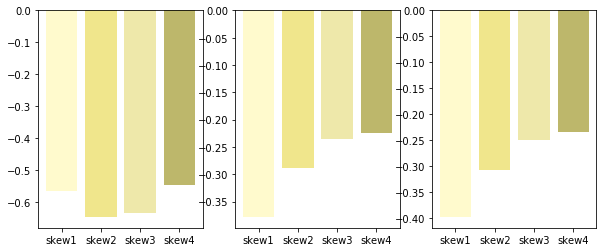

In [8]:
skewness1 = ['skew1', 'skew2', 'skew3', 'skew4']
skewnesses1 = [sound1.bandsStats['skew'][0], sound1.bandsStats['skew'][1], sound1.bandsStats['skew'][2], sound1.bandsStats['skew'][3]]
skewness2 = ['skew1', 'skew2', 'skew3', 'skew4']
skewnesses2 = [sound2.bandsStats['skew'][0], sound2.bandsStats['skew'][1], sound2.bandsStats['skew'][2], sound2.bandsStats['skew'][3]]
skewness3 = ['skew1', 'skew2', 'skew3', 'skew4']
skewnesses3 = [sound3.bandsStats['skew'][0], sound3.bandsStats['skew'][1], sound3.bandsStats['skew'][2], sound3.bandsStats['skew'][3]]

fig, axes = plt.subplots(1, 3, figsize=(10,4))
x = np.linspace(0, 5, 11)

axes[0].bar(skewness1,skewnesses1, color=['lemonchiffon', 'khaki', 'palegoldenrod', 'darkkhaki'])
axes[1].bar(skewness2,skewnesses2, color=['lemonchiffon', 'khaki', 'palegoldenrod', 'darkkhaki'])
axes[2].bar(skewness3,skewnesses3, color=['lemonchiffon', 'khaki', 'palegoldenrod', 'darkkhaki'])

<font size="3">When comparing the skewnees of the band envelopes, we see that the skew values in snippet 2 and 3 are higher than in snippet 1. These values seem to gradually increase in snippets 2 and 3 as we increase the band number. A possible reason for this is that when we listen to the bands of snippet 1 compared to the bands of snippets 2 and 3, we notice that the general volume and noise in each band of snippet 1 gradually increases as more time passes.</font>

### Comparing marginal statistics of band envelopes between different sounds

<font size="3">We will now compare the marginal statistics of band envelopes between three different sounds. Let's choose and read three different sound files that we found on the BBC website and clip them so that each is 30 seconds long.</font>

In [6]:
files = ['heavy_rain_clipped_halfmin.wav', 'estuary_atmosphere_clipped_halfmin.wav', 'desert_atmosphere_clipped_halfmin.wav']

first_sound = os.path.join(settings.SOUNDS_PATH, files[0])
sound1 = soundanalysis.SoundAnalysis(soundfile=first_sound)

second_sound = os.path.join(settings.SOUNDS_PATH, files[1])
sound2 = soundanalysis.SoundAnalysis(soundfile=second_sound)

third_sound = os.path.join(settings.SOUNDS_PATH, files[2])
sound3 = soundanalysis.SoundAnalysis(soundfile=third_sound)

<font size="3">We will next analyze the marginal statistics of each band envelope. It's important to notice how sound 1 is the loudest sound. It's the only sound out of the three that has almost the same volume throughout the half minute. Sound 2 and 3 start off silently and their volume increases gradually. Although they are more silent than sound 1, sound 3 is the least loud. These differences will affect our data. Let's analyze each one of the sounds - create and apply filterbank, calculate the envelopes for each band, apply compression to them and then calculate marginal statistics for each envelope.</font>

In [16]:
sound1.analyze(4, [20, 8000])
sound2.analyze(4, [20, 8000])
sound3.analyze(4, [20, 8000])

Creating filterbank...
Applying filterbank...
Calculating envelopes...
Applying compression...
Calculating statistics...
Creating filterbank...
Applying filterbank...
Calculating envelopes...
Applying compression...
Calculating statistics...
Creating filterbank...
Applying filterbank...
Calculating envelopes...
Applying compression...
Calculating statistics...


({'mean': array([7.16321324, 5.29148367, 4.5860445 , 5.21222268]),
  'var': array([5.79371011, 1.3967681 , 0.89208198, 1.0673649 ]),
  'var/meanSq': array([0.11291223, 0.04988493, 0.04241586, 0.03928864]),
  'skew': array([ 1.36433159, -0.17287444, -0.71500154, -0.58488558]),
  'kurt': array([6.29588657, 4.08237084, 3.7061767 , 3.40847671]),
  'corr': array([[1.        , 0.45445162, 0.15943339, 0.13926749],
         [0.45445162, 1.        , 0.27188346, 0.21531317],
         [0.15943339, 0.27188346, 1.        , 0.26060606],
         [0.13926749, 0.21531317, 0.26060606, 1.        ]])},
 <soundanalysis.FilterBank at 0x1920f26d488>)

<font size="3">Calculate and compare the mean of the envelopes in each sound.</font>

<BarContainer object of 4 artists>

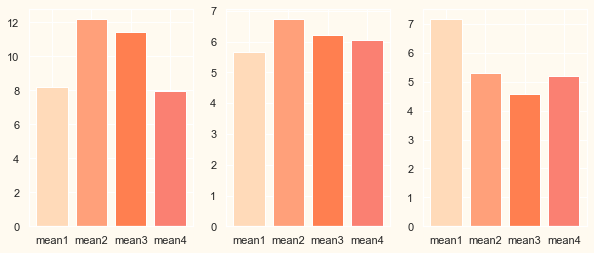

In [17]:
mean1 = ['mean1', 'mean2', 'mean3', 'mean4']
means1 = [sound1.bandsStats['mean'][0], sound1.bandsStats['mean'][1], sound1.bandsStats['mean'][2], sound1.bandsStats['mean'][3]]
mean2 = ['mean1', 'mean2', 'mean3', 'mean4']
means2 = [sound2.bandsStats['mean'][0], sound2.bandsStats['mean'][1], sound2.bandsStats['mean'][2], sound2.bandsStats['mean'][3]]
mean3 = ['mean1', 'mean2', 'mean3', 'mean4']
means3 = [sound3.bandsStats['mean'][0], sound3.bandsStats['mean'][1], sound3.bandsStats['mean'][2], sound3.bandsStats['mean'][3]]

fig, axes = plt.subplots(1, 3, figsize=(10,4))
x = np.linspace(0, 5, 11)

axes[0].bar(mean1, means1, color=['peachpuff', 'lightsalmon', 'coral', 'salmon'])
axes[1].bar(mean2, means2, color=['peachpuff', 'lightsalmon', 'coral', 'salmon'])
axes[2].bar(mean3, means3, color=['peachpuff', 'lightsalmon', 'coral', 'salmon'])

<font size="3">The mean of each band tells us that one band is louder than another. We know that sound 1 is the loudest sound, and this is reflected with its high mean values for each band envelope. The means of the band envelopes decrease in sounds 2 and decrease even more in sound 3. Now we will calculate and compare the variance of the envelopes in each sound.</font>

<BarContainer object of 4 artists>

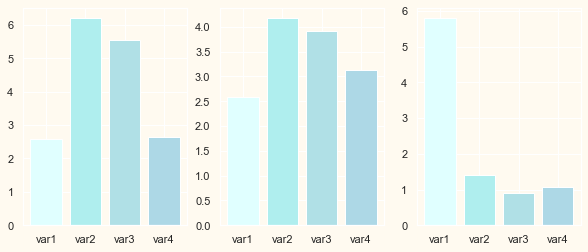

In [18]:
variance1 = ['var1', 'var2', 'var3', 'var4']
variances1 = [sound1.bandsStats['var'][0], sound1.bandsStats['var'][1], sound1.bandsStats['var'][2], sound1.bandsStats['var'][3]]
variance2 = ['var1', 'var2', 'var3', 'var4']
variances2 = [sound2.bandsStats['var'][0], sound2.bandsStats['var'][1], sound2.bandsStats['var'][2], sound2.bandsStats['var'][3]]
variance3 = ['var1', 'var2', 'var3', 'var4']
variances3 = [sound3.bandsStats['var'][0], sound3.bandsStats['var'][1], sound3.bandsStats['var'][2], sound3.bandsStats['var'][3]]

fig, axes = plt.subplots(1, 3, figsize=(10,4))
x = np.linspace(0, 5, 11)

axes[0].bar(variance1,variances1, color=['lightcyan', 'paleturquoise', 'powderblue', 'lightblue'])
axes[1].bar(variance2,variances2, color=['lightcyan', 'paleturquoise', 'powderblue', 'lightblue'])
axes[2].bar(variance3,variances3, color=['lightcyan', 'paleturquoise', 'powderblue', 'lightblue'])

<font size="3">Variance values of the band envelopes of sound 3 are lower than in sound 1 and sound 2. One of the possible reasons why the band envelopes in sound 3 have lower variance levels could be because when we listen to sound 3, we experience the least amount of noise. We just hear a continuous low frequency sound. We will now calculate and compare the kurtosis of the envelopes in each sound.</font>

<BarContainer object of 4 artists>

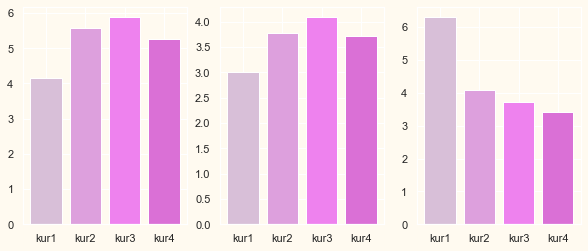

In [19]:
kurtosis1 = ['kur1', 'kur2', 'kur3', 'kur4']
kurtoses1 = [sound1.bandsStats['kurt'][0], sound1.bandsStats['kurt'][1], sound1.bandsStats['kurt'][2], sound1.bandsStats['kurt'][3]]
kurtosis2 = ['kur1', 'kur2', 'kur3', 'kur4']
kurtoses2 = [sound2.bandsStats['kurt'][0], sound2.bandsStats['kurt'][1], sound2.bandsStats['kurt'][2], sound2.bandsStats['kurt'][3]]
kurtosis3 = ['kur1', 'kur2', 'kur3', 'kur4']
kurtoses3 = [sound3.bandsStats['kurt'][0], sound3.bandsStats['kurt'][1], sound3.bandsStats['kurt'][2], sound3.bandsStats['kurt'][3]]

fig, axes = plt.subplots(1, 3, figsize=(10,4))
x = np.linspace(0, 5, 11)

axes[0].bar(kurtosis1,kurtoses1, color=['thistle', 'plum', 'violet', 'orchid'])
axes[1].bar(kurtosis2,kurtoses2, color=['thistle', 'plum', 'violet', 'orchid'])
axes[2].bar(kurtosis3,kurtoses3, color=['thistle', 'plum', 'violet', 'orchid'])

<font size="3">Kurtosis values are generally lower for sound 2 and 3, and we recognize that in sound 3 the kurtosis values decrease as we increase the band number.In sound 1 and 2 the kurtosis values are the highest in band 3. Now let's calculate and compare the skewness of the envelopes in each sound.</font>

<BarContainer object of 4 artists>

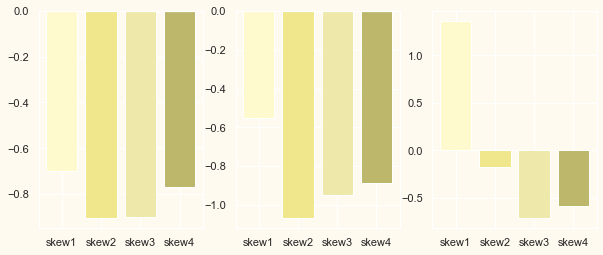

In [20]:
skewness1 = ['skew1', 'skew2', 'skew3', 'skew4']
skewnesses1 = [sound1.bandsStats['skew'][0], sound1.bandsStats['skew'][1], sound1.bandsStats['skew'][2], sound1.bandsStats['skew'][3]]
skewness2 = ['skew1', 'skew2', 'skew3', 'skew4']
skewnesses2 = [sound2.bandsStats['skew'][0], sound2.bandsStats['skew'][1], sound2.bandsStats['skew'][2], sound2.bandsStats['skew'][3]]
skewness3 = ['skew1', 'skew2', 'skew3', 'skew4']
skewnesses3 = [sound3.bandsStats['skew'][0], sound3.bandsStats['skew'][1], sound3.bandsStats['skew'][2], sound3.bandsStats['skew'][3]]

fig, axes = plt.subplots(1, 3, figsize=(10,4))
x = np.linspace(0, 5, 11)

axes[0].bar(skewness1,skewnesses1, color=['lemonchiffon', 'khaki', 'palegoldenrod', 'darkkhaki'])
axes[1].bar(skewness2,skewnesses2, color=['lemonchiffon', 'khaki', 'palegoldenrod', 'darkkhaki'])
axes[2].bar(skewness3,skewnesses3, color=['lemonchiffon', 'khaki', 'palegoldenrod', 'darkkhaki'])

<font size="3">The skewness values are the highest for sound 3, while we see the lowest values in sound 2.</font>